# The Battle of Covid19 

## Introduction 

Coronavirus sickness (COVID-19) is an irresistible infection brought about by another infection. 

The infection causes respiratory ailment (like this season's flu virus) with manifestations, for example, a hack, fever, and in progressively extreme cases, trouble relaxing. You can secure yourself by washing your hands as often as possible, abstaining from contacting your face, and maintaining a strategic distance from close contact (1 meter or 3 feet) with individuals who are unwell. 

##  Problem Statement 

This Virus has spread all through the world, which caused a significant misfortune in human life and financial everyday practice. Besides, The Virus has affected in excess of 7 lacs individuals all through the world with recuperation pace of 2% and 34000+ Deaths all through the world. The Major Countries Such as China , Itlay , US , Germany and so on have huge measure of paitents who are affected with Covid19. 

As, this Virus has caused pandamic debacle all through the world. India has least number of cases on the planet till now as India has played it safe to forestall this pandamic. 

We will try to figure out The most effected states in India with more population and least number number of center.With the Most effected states we will find most effected citites in that paticular states.

As of Now we have least number of cases compared to rest of the countries. But talking about the stats we have mass number of population and very limited amount of reasources.Taking the worst case Senrio we need to expand the resources with limited number of doctors who will be treating the paitents.

## Goal 

Lets Assume, we have 800 beds accessible in the fundamental center.In Case if beds are completly full we need a seclusion place yet alloting an isloation community would help paitents however we have 10 principle specialists who are treating critcal just as expected paitents. 

Imagine a scenario where we discover the closest medical clinics or a seclusion community inside 1.5 to 3 km of range to such an extent that in time of crisis or for normal exam they can without much of a stretch travel inside 3 km range to numerous focuses. 

1.This Will assist with decreasing the quantity of passings and help paitents to fix quick. 

2.By breaking down versertile paitents, there would be more possibilty for their examination group to handily discover arrangement and get ready immunization.

#### What We will Do

With information driven technique 

1.We will Optimize the and find conceivable isloation habitats which are closest to our test place in the event that we unexpectedly have ascend in symotmatic paitents. We can designate them to that place through which an indvdiual specialists can assume responsibility for the paitents by utilizing Foursqure API. 

2.By Using Machine Learning we will amass the basic paitents and typical paitents closest to the test place inside 1.5 km of range.

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import json
import xml
import pandas as pd
import numpy as np

!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

import json
from pprint import pprint

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## Working with Test Center Data Set

In [2]:
url= 'https://docs.google.com/spreadsheets/d/1vvhdhxNPlEqIZxfQiSGmYCnNf6WB37vhXo3P5W08CQE/edit?usp=sharing'

In [3]:
data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTowbPbWhuIRQgVzJR0mVcFv4nG59m5JAOcSCGbaTOm3LO9g0ORIJgxAiqDPBk6Y71e2nTukwj2spsG/pub?output=csv'

In [4]:
import pandas as pd
file = pd.read_csv(data,sep=",") # use sep="," for coma separation. 
file.describe()

,Latitude,Longitude
count,62.000000,62.000000
mean,21.574865,80.200249
std,7.136525,6.287965
min,8.485500,72.114700
25%,14.966342,76.176767
50%,23.139585,77.640610
75%,26.839086,82.076485
max,34.141700,94.908370


In [5]:
file = file.drop(file.index[0])

In [6]:
file

,State,TestCenter,City,Latitude,Longitude
1,ANDHRA PRADESH,Sri Venkateswara Institute of Medical Sciences,Tirupati,22.467370,88.378590
2,ANDHRA PRADESH,Andhra Medical College,Visakhapatnam,15.821800,78.038840
3,ANDHRA PRADESH,GMC,Anantapur,14.681190,77.596700
4,ANDHRA PRADESH,Sidhartha Medical College,Vijayawada,16.491640,80.690150
5,ANDHRA PRADESH,Rangaraya Medical College,Kakinada,20.474449,85.888367
6,ANDAMAN and NICOBAR ISLANDS,Regional Medical Research Centre,Port Blair,11.666670,92.750000
7,ASSAM,Gauhati Medical College,Guwahati,26.159511,91.768664
8,ASSAM,Regional Medical Research Center,Dibrugarh,27.479890,94.908370
9,ASSAM,Silchar Medical College,Silchar,24.775197,92.797140
10,ASSAM,Jorhat Medical College,Jorhat,26.757510,94.203060


In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 5 columns):
State         62 non-null object
TestCenter    62 non-null object
City          62 non-null object
Latitude      62 non-null float64
Longitude     62 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.9+ KB


## Ploting Test Center Using Geolocator and Folium

In [8]:
address = 'India'
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are 22.3511148, 78.6677428.


In [50]:
map_test_center = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(file['Latitude'], file['Longitude'], file['TestCenter']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_test_center)  
    


In [49]:
map_test_center

## Finding out which state has most population Population 

In [10]:
url_list = requests.get('https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population#List').text

In [11]:
soup = BeautifulSoup(url_list, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of states and union territories of India by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XnoN@ApAIHkAA9cdR@YAAABD","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_states_and_union_territories_of_India_by_population","wgTitle":"List of states and union territories of India by population","wgCurRevisionId":947126344,"wgRevisionId":947126344,"wgArticleId":537103,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short descri

In [12]:
wiki_extract = soup.find("table", class_ = 'wikitable sortable')
wiki_table_rows = wiki_extract.find_all('tr')

In [13]:
information = []
for row in wiki_table_rows:
    info = row.text.split('\n')[1:-1]
    information.append(info)
    
state_df = pd.DataFrame(information[0:])

state_df = state_df.drop(state_df.columns[[0, 17, 18]], axis=1) 

In [14]:
state_df.columns = state_df.iloc[0]
state_df = state_df.reindex(state_df.index.drop(0)).reset_index(drop=True)
state_df.columns.name = None

In [15]:
state_df

,,State or union territory,,Population(%),,Decadal growth(2001–2011),,Rural population(%),,Urban population(%),,Area[16],,Density[a],,Sex ratio
0,,Uttar Pradesh,,"199,812,341(16.51%)",,20.2%,,"155,317,278(77.73%)",,"44,495,063(22.27%)",,"240,928 km2 (93,023 sq mi)",,"828/km2 (2,140/sq mi)",,912
1,,Maharashtra,,"112,374,333(9.28%)",,20.0%,,"61,556,074(54.78%)",,"50,818,259(45.22%)",,"307,713 km2 (118,809 sq mi)",,365/km2 (950/sq mi),,929
2,,Bihar,,"104,099,452(8.6%)",,25,.4%,,,"92,341,436(88.71%)",,"11,758,016(11.29%)",,"94,163 km2 (36,357 sq mi)",,"1,102/km2 (2,850/sq mi)"
3,,West Bengal,,"91,276,115(7.54%)",,13.8%,,"62,183,113(68.13%)",,"29,093,002(31.87%)",,"88,752 km2 (34,267 sq mi)",,"1,029/km2 (2,670/sq mi)",,953
4,,Madhya Pradesh,,"72,626,809(6%)",,16.3%,,"52,557,404(72.37%)",,"20,069,405(27.63%)",,"308,245 km2 (119,014 sq mi)",,236/km2 (610/sq mi),,931
5,,Tamil Nadu,,"72,147,030(5.96%)",,15.6%,,"37,229,590(51.6%)",,"34,917,440(48.4%)",,"130,058 km2 (50,216 sq mi)",,"555/km2 (1,440/sq mi)",,996
6,,Rajasthan,,"68,548,437(5.66%)",,21.3%,,"51,500,352(75.13%)",,"17,048,085(24.87%)",,"342,239 km2 (132,139 sq mi)",,201/km2 (520/sq mi),,928
7,,Karnataka,,"61,095,297(5.05%)",,15.6%,,"37,469,335(61.33%)",,"23,625,962(38.67%)",,"191,791 km2 (74,051 sq mi)",,319/km2 (830/sq mi),,973
8,,Gujarat,,"60,439,692(4.99%)",,19.3%,,"34,694,609(57.4%)",,"25,745,083(42.6%)",,"196,024 km2 (75,685 sq mi)",,308/km2 (800/sq mi),,919
9,,Andhra Pradesh,,"49,577,103[b] (4.08%)",,11.0%,,"34,966,693(70.53%)",,"14,610,410(29.47%)",,"162,968 km2 (62,922 sq mi)",,303/km2 (780/sq mi),,993


UP, Maharastra and Bihar are the three states with most population.

## Finding Out Which State is highly Infected

In [16]:
covid_case = requests.get("https://www.mohfw.gov.in").text

In [17]:
soup = BeautifulSoup(covid_case, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Ministry of Health and Family Welfare | GOI RSS
  </title>
  <link href="assets/images/favicon.ico" rel="shortcut icon"/>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/css/bootstrap.min.css" rel="stylesheet"/>
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js">
  </script>
  <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/js/bootstrap.min.js">
  </script>
  <link href="assets/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="https://fonts.googleapis.com/css?family=Poppins:300,400,500,600,700" rel="stylesheet"/>
  <link href="assets/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="assets/css/style.css" rel="stylesheet" type="text/css"/>
  <!--[if lt IE 9]>
		<script type="text/javascript" src="assets/js/html5.js"></script>
        <scrip

In [18]:
wiki_covid = soup.find("div", id = 'cases')
covid_table_rows = wiki_covid.find_all('tr')

In [19]:
covid_table_rows

[<tr bgcolor="#f8f8f8">
 <th align="left" width="47"><strong>S. No.</strong></th>
 <th align="left" width="83"><strong>Name of State / UT</strong></th>
 <th align="left" width="91"><strong>Total Confirmed cases *</strong></th>
 <!--<th align="left" width="90"><strong>Total Confirmed cases ( Foreign National )</strong></th>-->
 <th align="left" width="83"><strong>Cured/<br/>Discharged/Migrated</strong></th>
 <th align="left" width="83"><strong>Death</strong></th>
 </tr>, <tr>
 <td align="'centre" width="47">1</td>
 <td align="'centre" valign="bottom" width="83">Andhra Pradesh</td>
 <td align="'centre" valign="bottom" width="91">19</td>
 <!--<td align="'centre" width="90" valign="top">0</td>-->
 <td align="'centre" valign="top" width="83">1</td>
 <td align="'centre" valign="top" width="83">0</td>
 </tr>, <tr>
 <td align="'centre" width="47">2</td>
 <td align="'centre" valign="bottom" width="83">Andaman and Nicobar Islands</td>
 <td align="'centre" valign="bottom" width="91">9</td>
 <!--<

In [20]:
covid_information = []
for row in covid_table_rows:
    info = row.text.split('\n')
   
    covid_information.append(info)
    
covid_information

[['',
  'S. No.',
  'Name of State / UT',
  'Total Confirmed cases *',
  '',
  'Cured/Discharged/Migrated',
  'Death',
  ''],
 ['', '1', 'Andhra Pradesh', '19', '', '1', '0', ''],
 ['', '2', 'Andaman and Nicobar Islands', '9', '', '0', '0', ''],
 ['', '3', 'Bihar', '11', '', '0', '1', ''],
 ['', '4', 'Chandigarh', '8', '', '0', '0', ''],
 ['', '5', 'Chhattisgarh', '7', '', '0', '0', ''],
 ['', '6', 'Delhi', '53', '', '6', '2', ''],
 ['', '7', 'Goa', '5', '', '0', '0', ''],
 ['', '8', 'Gujarat', '58', '', '1', '5', ''],
 ['', '9', 'Haryana', '33', '', '17', '0', ''],
 ['', '10', 'Himachal Pradesh', '3', '', '0', '1', ''],
 ['', '11', 'Jammu and Kashmir', '31', '', '1', '2', ''],
 ['', '12', 'Karnataka', '80', '', '5', '3', ''],
 ['', '13', 'Kerala', '194', '', '19', '1', ''],
 ['', '14', 'Ladakh', '13', '', '3', '0', ''],
 ['', '15', 'Madhya Pradesh', '33', '', '0', '2', ''],
 ['', '16', 'Maharashtra', '193', '', '25', '8', ''],
 ['', '17', 'Manipur', '1', '', '0', '0', ''],
 ['', '18',

In [21]:
covid_df = pd.DataFrame(covid_information)
covid_df = covid_df.drop(covid_df.columns[[0, 7, 8,9,10]], axis=1) 

covid_df.columns = covid_df.iloc[0]
covid_df = covid_df.reindex(covid_df.index.drop(0)).reset_index(drop=True)
covid_df.columns.name = None

covid_df = covid_df.drop(covid_df.index[27])

In [22]:
covid_df['Total Confirmed cases *'] = covid_df['Total Confirmed cases *'].astype(int)
covid_df

,S. No.,Name of State / UT,Total Confirmed cases *,,Cured/Discharged/Migrated,Death
0,1,Andhra Pradesh,19,,1,0
1,2,Andaman and Nicobar Islands,9,,0,0
2,3,Bihar,11,,0,1
3,4,Chandigarh,8,,0,0
4,5,Chhattisgarh,7,,0,0
5,6,Delhi,53,,6,2
6,7,Goa,5,,0,0
7,8,Gujarat,58,,1,5
8,9,Haryana,33,,17,0
9,10,Himachal Pradesh,3,,0,1


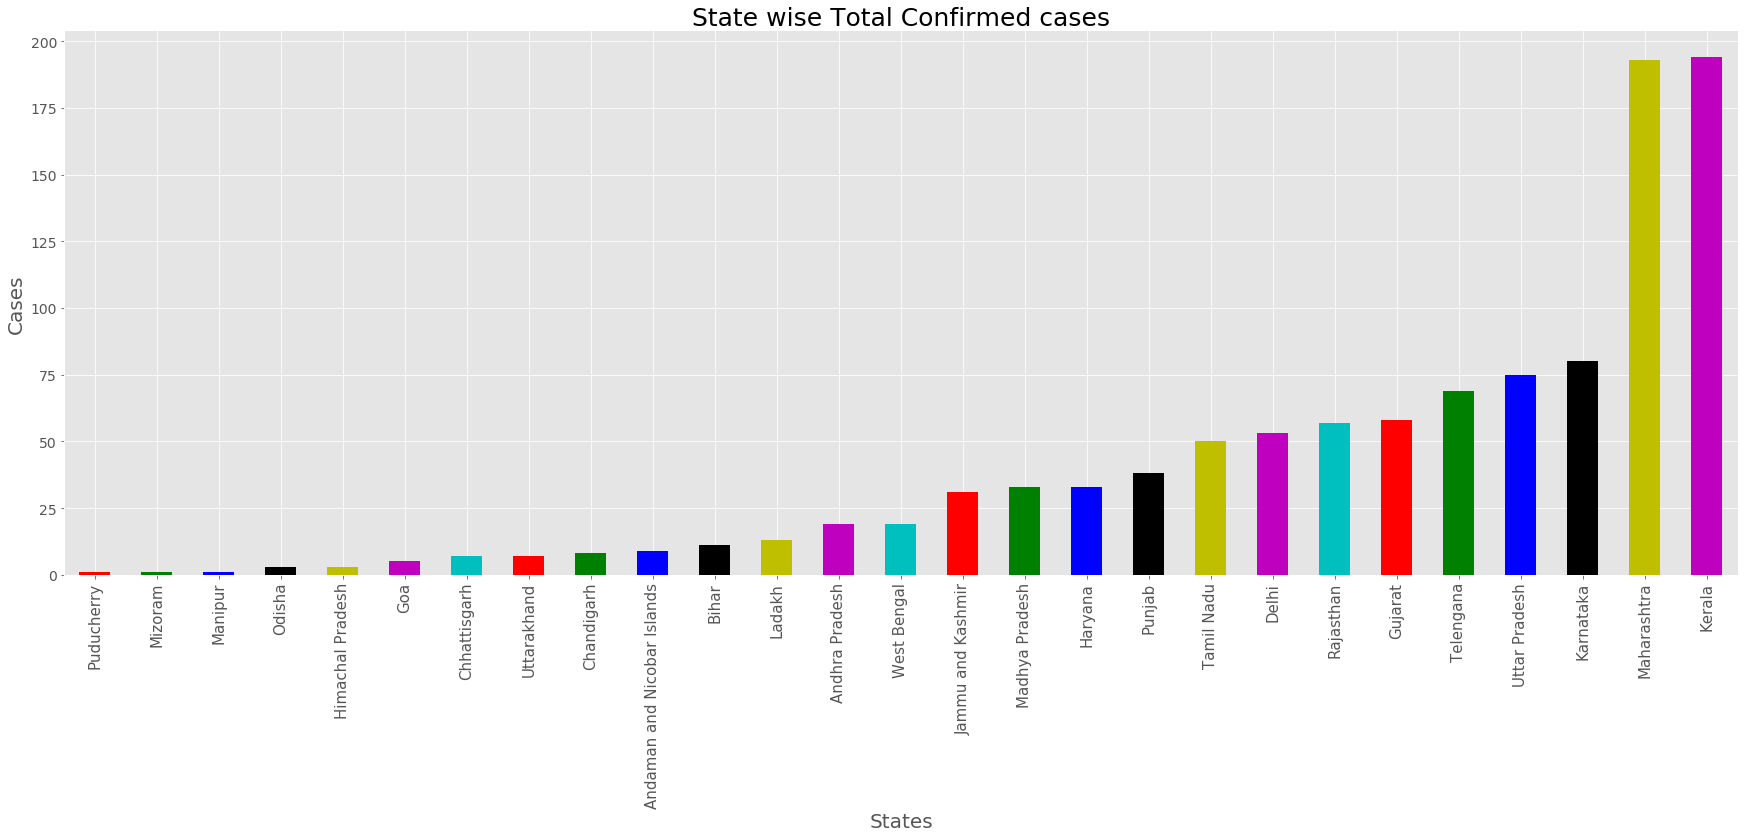

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

my_colors = 'rgbkymc'

covid_df2 = covid_df[['Name of State / UT', 'Total Confirmed cases *']].sort_values(by = 'Total Confirmed cases *', ascending = True)
index = covid_df2.set_index("Name of State / UT", inplace = True)
bar = covid_df2.plot(kind='bar',figsize=(30, 10) ,color=my_colors, legend = None)
bar
plt.yticks(fontsize = 14)
plt.xticks(index, fontsize=15, rotation=90)

plt.xlabel("States", fontsize = 20)
plt.ylabel("Cases", fontsize = 20)
plt.title("State wise Total Confirmed cases", fontsize=25)

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)


#fig, axes= plt.subplots(nrows=1, ncols=1,figsize=(20,10))
#state = covid_df['Name of State / UT']
#cases = covid_df['Total Confirmed cases *']
#x_pos = [i for i, _ in enumerate(state)]
#index = np.arange(len(state))

#plt.bar("Name of State / UT","Total Confirmed cases *",data = covid_df)
plt.show()

Kerala and Maharashtra are two states which are highly effected with 190+ Cases. But We will choose Maharashtra because,

1. Maharastra has secound highest Population in the country 

2. It has only two test Centers

## Finding Out which city is most infected

In [24]:
mh_data = requests.get('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Maharashtra#Statistics').text

In [25]:
soup = BeautifulSoup(mh_data, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   2020 coronavirus pandemic in Maharashtra - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XoHRbwpAAEYAADiR5AkAAAEJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"2020_coronavirus_pandemic_in_Maharashtra","wgTitle":"2020 coronavirus pandemic in Maharashtra","wgCurRevisionId":948141790,"wgRevisionId":948141790,"wgArticleId":63388600,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using duplicate arguments in template calls","Articles with short descripti

In [26]:
wiki_mh = soup.find("table", class_ = 'wikitable')
mh_table_rows = wiki_mh.find_all('tr')

mh_information = []
for row in mh_table_rows:
    info = row.text.split('\n')
   
    mh_information.append(info)
    
mh_information

[['', 'District', '', 'Total cases', '', 'Deaths', '', 'Notes', ''],
 ['', 'Mumbai City + Mumbai Suburban', '', '88', '', '6', '', '', ''],
 ['',
  'Thane',
  '',
  '18',
  '',
  '1',
  '',
  'Kalyan-Dombivli (7), Navi Mumbai (6), Thane (5), Ulhasnagar (1)',
  ''],
 ['', 'Palghar', '', '5', '', '0', '', ' Vasai-Virar (4), Palghar (1)', ''],
 ['', 'Raigad', '', '2', '', '0', '', 'Panvel (2)', ''],
 ['', 'Total in Mumbai Metropolitan Region', '', '113', '', '7', '', '', ''],
 ['', 'Pune', '', '42', '', '0', '', '', ''],
 ['', 'Sangli', '', '25', '', '0', '', '', ''],
 ['', 'Nagpur', '', '16', '', '0', '', '', ''],
 ['', 'Ahmednagar', '', '5', '', '0', '', '', ''],
 ['', 'Yavatmal', '', '4', '', '0', '', '', ''],
 ['', 'Kolhapur', '', '2', '', '0', '', '', ''],
 ['', 'Satara', '', '2', '', '0', '', '', ''],
 ['', 'Aurangabad', '', '1', '', '0', '', '', ''],
 ['', 'Buldhana', '', '1', '', '1', '', '', ''],
 ['', 'Gondia', '', '1', '', '0', '', '', ''],
 ['', 'Jalgaon', '', '1', '', '0', ''

In [27]:
mh_df = pd.DataFrame(mh_information[0:])
mh_df.columns = mh_df.iloc[0]
mh_df = mh_df.reindex(mh_df.index.drop(0)).reset_index(drop=True)
mh_df.columns.name = None

In [28]:
mh_df

,,District,,Total cases,,Deaths,,Notes,
0,,Mumbai City + Mumbai Suburban,,88,,6,,,
1,,Thane,,18,,1,,"Kalyan-Dombivli (7), Navi Mumbai (6), Thane (5...",
2,,Palghar,,5,,0,,"Vasai-Virar (4), Palghar (1)",
3,,Raigad,,2,,0,,Panvel (2),
4,,Total in Mumbai Metropolitan Region,,113,,7,,,
5,,Pune,,42,,0,,,
6,,Sangli,,25,,0,,,
7,,Nagpur,,16,,0,,,
8,,Ahmednagar,,5,,0,,,
9,,Yavatmal,,4,,0,,,


As We know, Maharastra has second highest population and second highest Infected State in the Country with least number of Test Center. 
We will Pick up Mumbai(As we know Mumbai is very densly populated with highest number 0f cases) and we will try to impliment solutions.

## Accessing Four Square API

In [29]:
CLIENT_ID ='C1BB50HNQVJUNJBXQ2PDTEFSOX1SGJGLIEEJPYFFXADJH313' # portion hidden from view' # your Foursquare ID
CLIENT_SECRET = '30QKDGXPGJOCSKRETYN4G1CFQHVGZXBWNHSU3DSUTZ5QPAHL'# portion hidden from view' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
radius = 2000
categoryId = "4bf58dd8d48988d196941735"
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C1BB50HNQVJUNJBXQ2PDTEFSOX1SGJGLIEEJPYFFXADJH313
CLIENT_SECRET:30QKDGXPGJOCSKRETYN4G1CFQHVGZXBWNHSU3DSUTZ5QPAHL


## Getting Near by Hospltals within 2.5 km of range 

In [30]:
mum_lat = 18.98546
mum_long = 72.83132

In [31]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    categoryId,
    mum_lat, 
    mum_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?&client_id=C1BB50HNQVJUNJBXQ2PDTEFSOX1SGJGLIEEJPYFFXADJH313&client_secret=30QKDGXPGJOCSKRETYN4G1CFQHVGZXBWNHSU3DSUTZ5QPAHL&v=20180604&categoryId=4bf58dd8d48988d196941735&ll=18.98546,72.83132&radius=2000&limit=50'

In [32]:
venues_list=[]

results =  requests.get(url).json()["response"]['venues']

In [33]:
venues_list.append([(
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['location']['distance']) for v in results])


In [34]:
nearby_venues = pd.DataFrame([venues for venue_list in venues_list for venues in venue_list])
nearby_venues.columns = ['Near by Hospitals', 
                  'Latitude', 
                 'Longitude','Distance']
nearby_venues =  nearby_venues.dropna()
nearby_venues =  nearby_venues.reset_index(drop=True)

In [35]:
nearby_venues

,Near by Hospitals,Latitude,Longitude,Distance
0,Dr Babasaheb Ambedkar Memorial Hospital,18.979982,72.833486,651
1,Dr B A M Hospital,18.979415,72.834303,742
2,Niar hospital,18.976120,72.827176,1127
3,Nirmala Hospital,18.984812,72.830059,151
4,Doctor's Quarters,19.004275,72.816960,2582
5,kasturbha hospital,18.980616,72.829620,568
6,"Wellspring, Lower Parel",18.977779,72.827191,959
7,All India Institue Of Physical Medicine & Reha...,18.980245,72.813060,2007
8,Jag Jeevan Ram Central Railway Hospital,18.971590,72.823706,1739
9,Jagjivan Ram Hospital,18.970964,72.824288,1775


In [51]:
print('There are {} hospitals within 2.5 km of range.'.format(len(nearby_venues['Near by Hospitals'])))

There are 22 hospitals within 2.5 km of range.


In [37]:
nearby_venues = nearby_venues.sort_values(by ='Distance' , ascending=True)
nearby_venues =  nearby_venues.reset_index(drop=True)
nearby_venues

,Near by Hospitals,Latitude,Longitude,Distance
0,Nirmala Hospital,18.984812,72.830059,151
1,kasturbha hospital,18.980616,72.829620,568
2,Dr Babasaheb Ambedkar Memorial Hospital,18.979982,72.833486,651
3,Dr B A M Hospital,18.979415,72.834303,742
4,"Wellspring, Lower Parel",18.977779,72.827191,959
5,King George Memorial Hospital,18.989853,72.823441,962
6,Niar hospital,18.976120,72.827176,1127
7,"Masina Hospital, Byculla",18.974487,72.836080,1320
8,Maru Charitable Hospital,18.997197,72.836956,1434
9,Nair Hospital,18.973648,72.822754,1594


In [38]:
nearby_venues['Distance'].mean()

nearest_distance = np.array(nearby_venues['Distance']>=1489)

mild_distance = np.array(nearby_venues['Distance']<= 1489)

print('Nearest within 1.5 km to center:' ,nearest_distance.sum())

print('Nearest between 1.5 to 2.5 km center:' ,mild_distance.sum())


Nearest within 1.5 km to center: 13
Nearest between 1.5 to 2.5 km center: 9


## Using K means algorithum to group nearby places  

In [39]:
kclusters = 3

nearby_venues_clustering = nearby_venues.drop('Near by Hospitals', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(nearby_venues_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
22


In [40]:
nearby_venues_merge = nearby_venues

nearby_venues['Cluster'] = kmeans.labels_



In [41]:
nearby_venues 

,Near by Hospitals,Latitude,Longitude,Distance,Cluster
0,Nirmala Hospital,18.984812,72.830059,151,0
1,kasturbha hospital,18.980616,72.829620,568,0
2,Dr Babasaheb Ambedkar Memorial Hospital,18.979982,72.833486,651,0
3,Dr B A M Hospital,18.979415,72.834303,742,0
4,"Wellspring, Lower Parel",18.977779,72.827191,959,0
5,King George Memorial Hospital,18.989853,72.823441,962,0
6,Niar hospital,18.976120,72.827176,1127,0
7,"Masina Hospital, Byculla",18.974487,72.836080,1320,1
8,Maru Charitable Hospital,18.997197,72.836956,1434,1
9,Nair Hospital,18.973648,72.822754,1594,1


## Plotting Map 

In [42]:
map_clusters = folium.Map(location=[mum_lat, mum_long], zoom_start=14)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []

for lat, lon, poi, cluster in zip(nearby_venues['Latitude'], nearby_venues['Longitude'], nearby_venues['Near by Hospitals'],kmeans.labels_):
    label = folium.Popup(str(poi), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Conclusion

We Found out 22 Hostpitals in the scope of 2.5 km. 

Right off the bat, We sucessfully Optimized the nearby area using Clustering Algorithum. 

1. For Cluster 0 we can say that these hosptials are close to the middle . So we can distribute that beds for critcal paitent. 

2. Similary, For Cluster 1,2 we can designate gentle and typical symtom paitents. 

Notwithstanding accomplish more accuary we can likewise use government schools, universities and shut zone places, for example, hotels, multi-corp. Structures for all the cities.